In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 7.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 524, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are {'predict', 'benchmark', 'track', 'train', 'export', 'val'}.

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'detect', 'obb', 'pose', 'classify', 'segment'}
                MODE (required) is one of {'predict', 'benchmark', 'track', 'train', 'export', 'val'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

# Inference Example with Pre Trained model

In [ ]:
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source=

# Dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="dCywePa2a44qCqOf6K0E")
project = rf.workspace("roboflow-58fyf").project("rock-paper-scissors-sxsw")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.28, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Rock-Paper-Scissors-SXSW-1 in yolov8:: 100%|██████████| 2270/2270 [00:00<00:00, 2489.54it/s]


In [ ]:
#@title Select YOLOv8 🚀 logger {run: 'auto'}
logger = 'Comet' #@param ['Comet', 'TensorBoard']

if logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir .

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.2/289.2 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 979.1/979.1 kB 21.4 MB/s eta 0:00:00
Please paste your Comet API key from https://www.comet.com/api/my/settings/
(api key may not show as you type)
Comet API key: ··········


COMET INFO: Valid Comet API Key saved in /content/drive/MyDrive/.comet.config (set COMET_CONFIG to change where it is saved).


In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/Rock-Paper-Scissors-SXSW-1/data.yaml epochs=5 imgsz=640

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Rock-Paper-Scissors-SXSW-1/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_

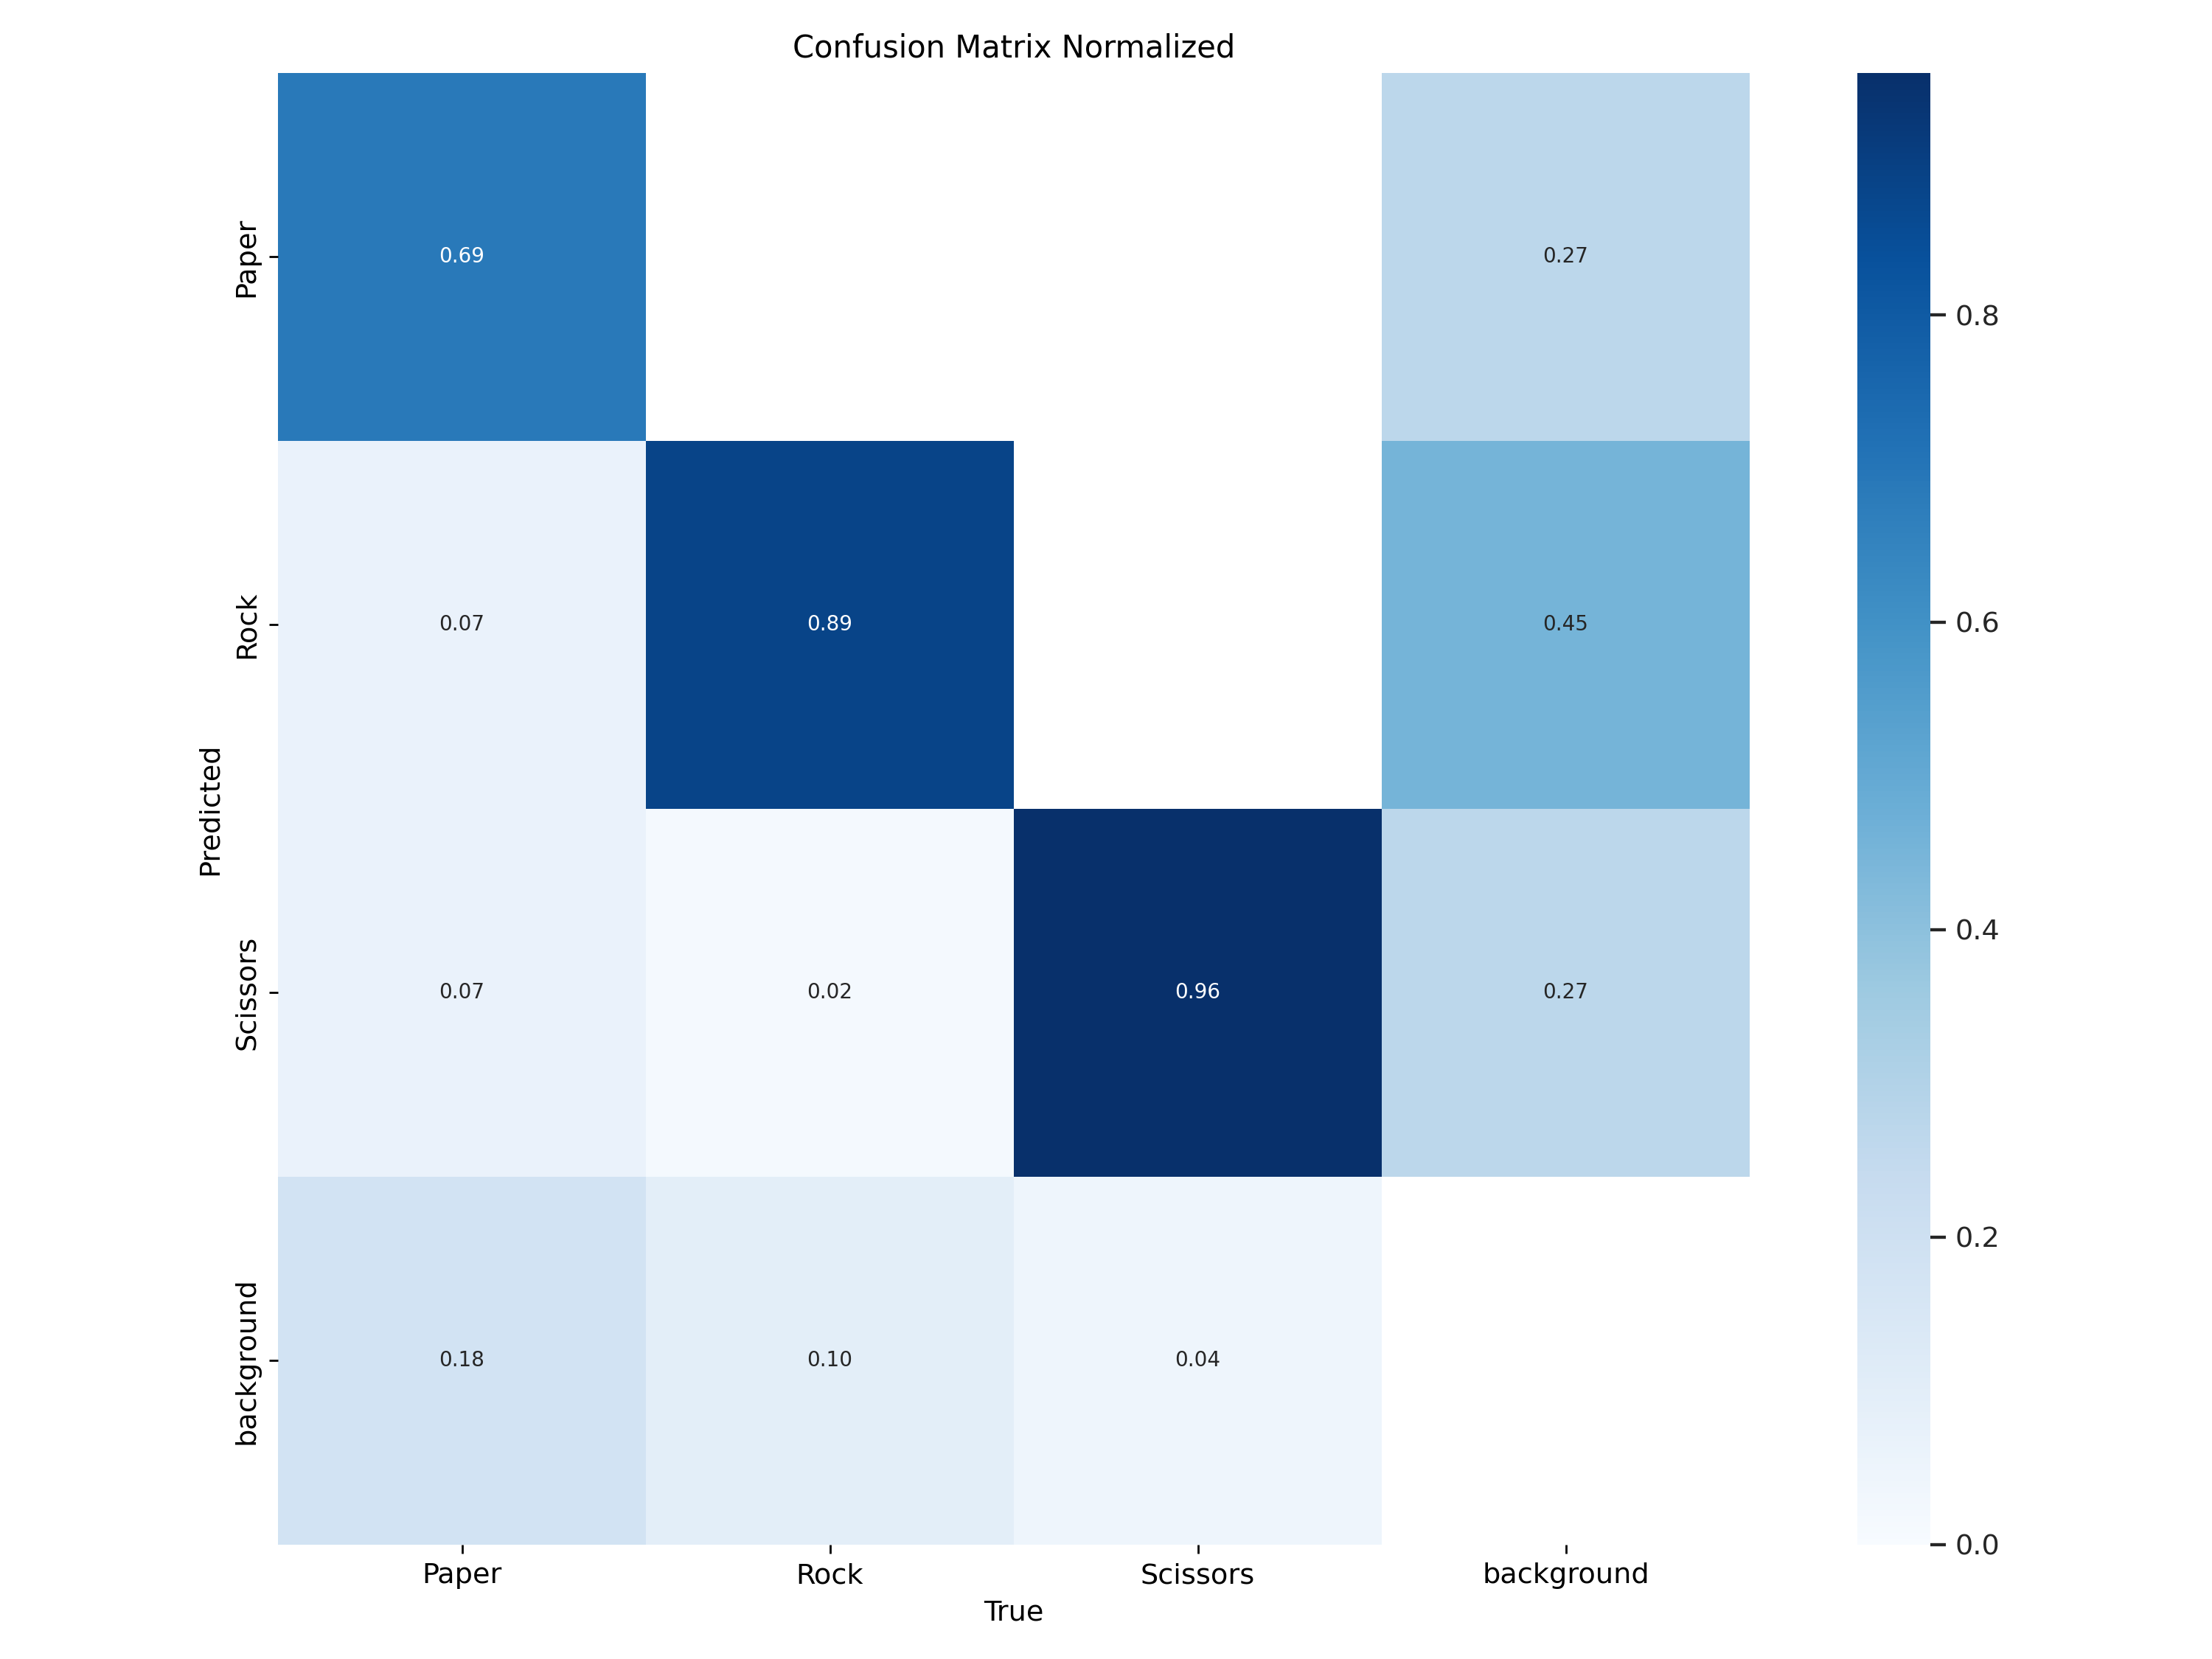

In [ ]:
Image(filename=f'/content/runs/detect/train6/confusion_matrix_normalized.png', width=600)

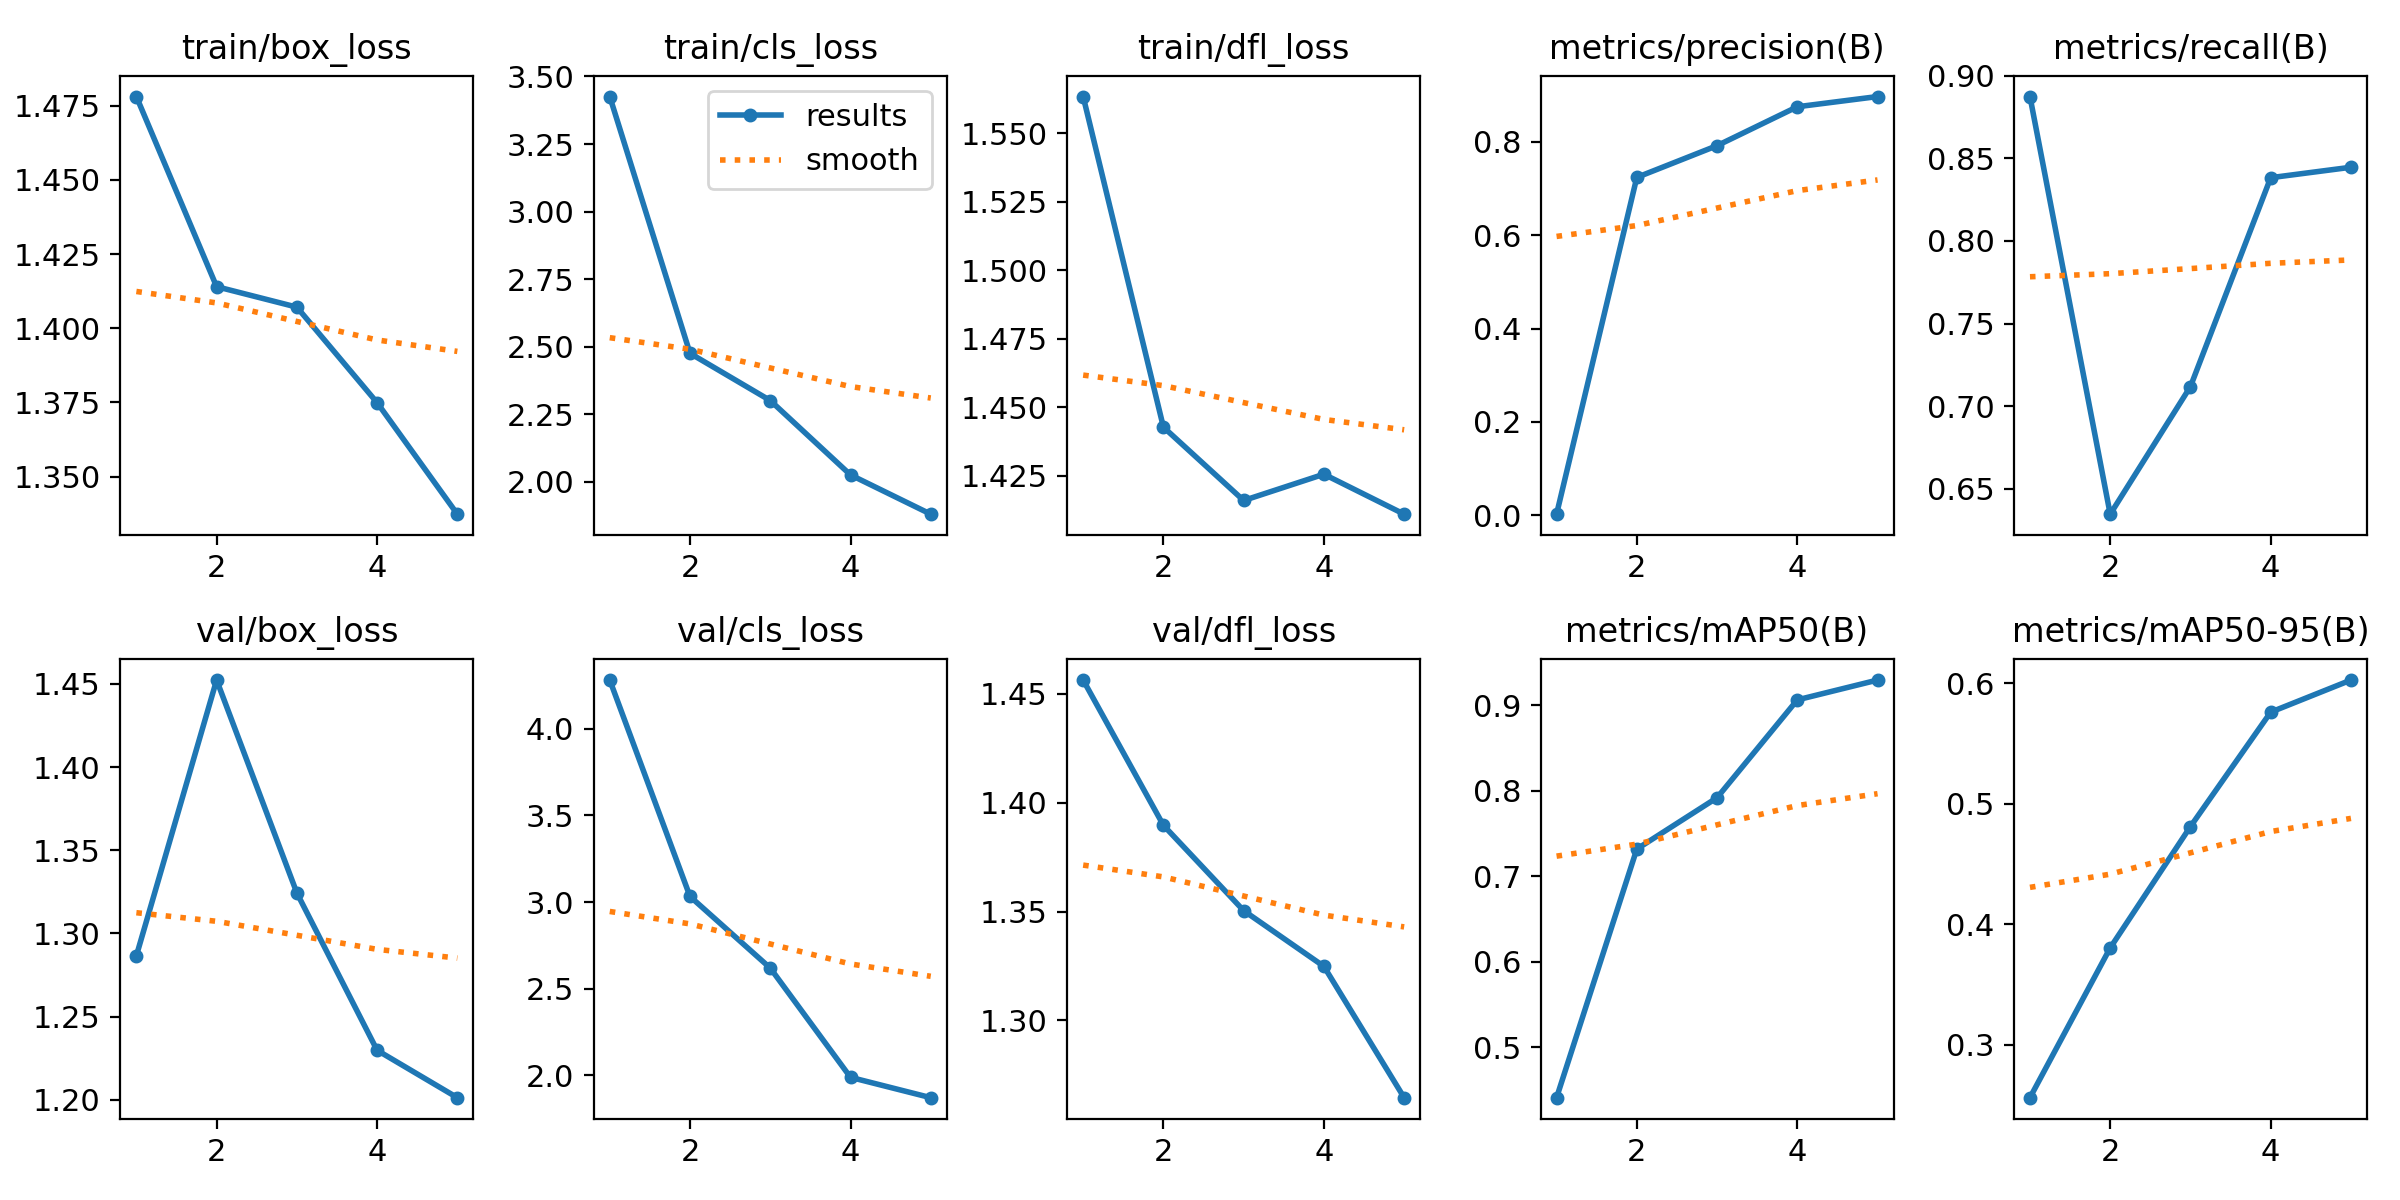

In [ ]:
Image(filename=f'/content/runs/detect/train6/results.png', width=600)

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train6/weights/best.pt conf=0.50 source=/content/Rock-Paper-Scissors-SXSW-1/test/images

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs

image 1/121 /content/Rock-Paper-Scissors-SXSW-1/test/images/20220216_221550_jpg.rf.917591a14d927beb413268686e9da8fe.jpg: 640x384 1 Scissors, 160.4ms
image 2/121 /content/Rock-Paper-Scissors-SXSW-1/test/images/20220216_221819_jpg.rf.83d963605761c81ecc8972b6a6b59e16.jpg: 640x384 1 Rock, 143.0ms
image 3/121 /content/Rock-Paper-Scissors-SXSW-1/test/images/20220216_221856_jpg.rf.9947164ac734eb8333f28de386d2f920.jpg: 640x384 1 Scissors, 184.8ms
image 4/121 /content/Rock-Paper-Scissors-SXSW-1/test/images/20220216_222153_jpg.rf.42a02e3dcaae8ac3aac05d809d256203.jpg: 640x384 1 Scissors, 236.8ms
image 5/121 /content/Rock-Paper-Scissors-SXSW-1/test/images/20220216_222607_jpg.rf.39805359b8642c3c9b23bb6a4bc40d4b.jpg: 640x384 1 Rock, 233.2ms
image 6/121 /content/Rock-Paper-Scissors-SXSW-1/test/images/CHESS_COURTYARD_B_T_frame_1110_jpg.rf.f

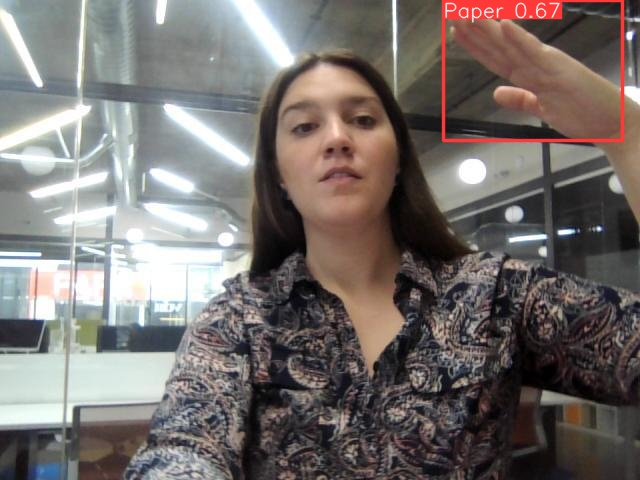

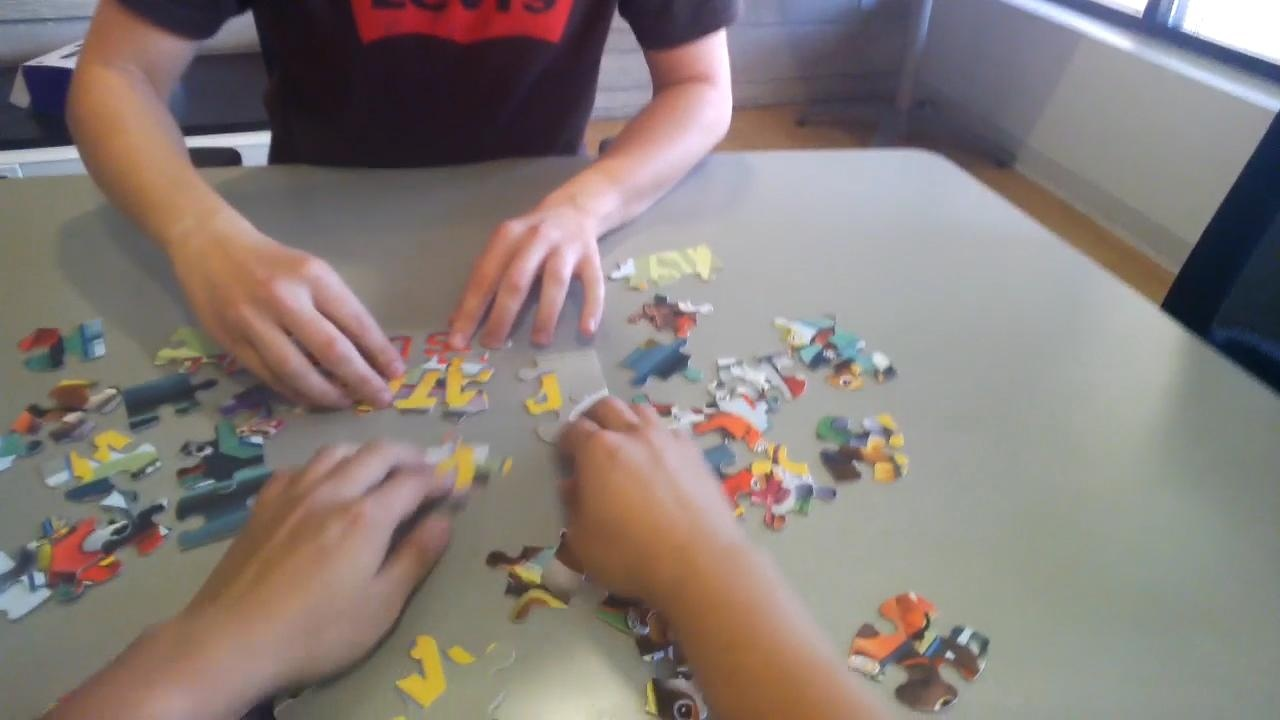

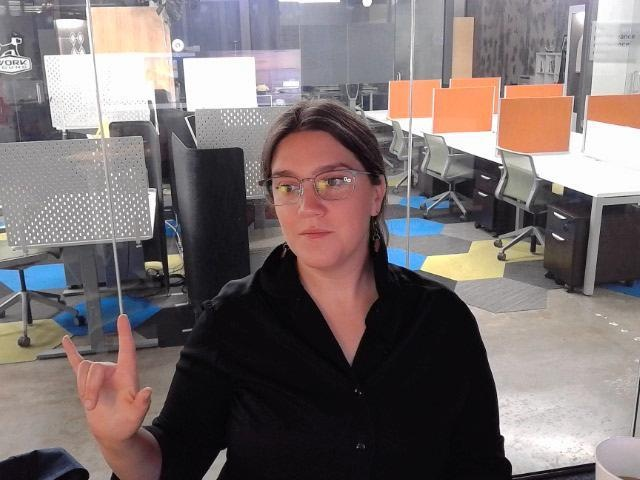

In [ ]:
import glob
from IPython.display import Image, display

for imag_path in glob.glob(f'/content/runs/detect/predict2/*.jpg')[:3]:
  display(Image(filename=imag_path, height=600))
  print('\n')

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train6/weights/best.pt conf=0.50 source=/VID20240605034522.mp4

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (frame 1/472) /VID20240605034522.mp4: 640x384 1 Rock, 176.7ms
video 1/1 (frame 2/472) /VID20240605034522.mp4: 640x384 1 Rock, 170.1ms
video 1/1 (frame 3/472) /VID20240605034522.mp4: 640x384 1 Rock, 200.0ms
video 1/1 (frame 4/472) /VID20240605034522.mp4: 640x384 (no detections), 259.8ms
video 1/1 (frame 5/472) /VID20240605034522.mp4: 640x384 (no detections), 676.0ms
video 1/1 (frame 6/472) /VID20240605034522.mp4: 640x384 (no detections), 339.3ms
video 1/1 (frame 7/472) /VID20240605034522.mp4: 640x384 (no detections), 249.8ms
video 1/1 (frame 8/472) /VID20240605034522.mp4: 640x384 (no detections), 240.3ms
video 1/1 (frame 9/472) /VID20240605034522.mp4: 640x384 (no detections), 243.5ms
video 1/1 (frame 10/472) /VID20240605034522.mp4: 640x384 (no detections), 255.3ms
video 1/1 (frame 11/472) /VID20240605034522.mp4: 640

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train6/weights/best.pt conf=0.50 source=/content/datasets/imageee

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs

image 1/3 /content/datasets/imageee/IMG20240605035738.jpg: 640x480 (no detections), 227.9ms
image 2/3 /content/datasets/imageee/IMG20240605035744.jpg: 640x480 1 Scissors, 300.8ms
image 3/3 /content/datasets/imageee/IMG20240605035747.jpg: 640x480 (no detections), 277.0ms
Speed: 7.3ms preprocess, 268.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict
